In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
import requests
import json
import requests 
import time
import json

# 读取人口普查数据

In [3]:
census = pd.read_csv("census_data.csv")

In [4]:
census.head(3)

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,601,18450,36.6,12041.0,7380.0,10816,58.623306
1,602,41302,38.6,15663.0,8463.0,22409,54.256452
2,603,53683,38.9,15485.0,9176.0,26220,48.842278


In [5]:
census.shape

(33120, 7)

把number信息放入到人口普查数据中

In [6]:
zip_counts = pd.read_csv("zip_res_counts.csv", header=None)

In [8]:
zip_counts.columns = ['Zipcode', 'number_of_res']

In [10]:
census_data = pd.merge(left=census, right=zip_counts, on="Zipcode", how="left")
census_data.dropna(subset=['number_of_res'], inplace=True)

In [11]:
census_data.head(3)

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,number_of_res
2558,10001,21966,34.7,81671.0,82166.0,3375,15.364654,1600.0
2559,10002,82191,39.8,33218.0,26227.0,23346,28.404570,1000.0
2560,10003,57310,32.3,92540.0,74189.0,5916,10.322806,1700.0


In [12]:
census_data.shape

(1690, 8)

# Analysis

1 首先查看变量之间的相关性

In [13]:
corr = census_data.corr()

In [14]:
corr

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,number_of_res
Zipcode,1.000000,-0.420702,0.099349,-0.484324,-0.474284,-0.315868,0.111675,-0.347383
Population,-0.420702,1.000000,-0.331665,0.007102,0.031355,0.850761,0.201721,0.476161
Median Age,0.099349,-0.331665,1.000000,0.058344,0.223682,-0.352947,-0.337259,-0.159532
Household Income,-0.484324,0.007102,0.058344,1.000000,0.786169,-0.210939,-0.560925,0.256936
Per Capita Income,-0.474284,0.031355,0.223682,0.786169,1.000000,-0.152598,-0.429345,0.270594
Poverty Count,-0.315868,0.850761,-0.352947,-0.210939,-0.152598,1.000000,0.420176,0.301141
Poverty Rate,0.111675,0.201721,-0.337259,-0.560925,-0.429345,0.420176,1.000000,-0.014328
number_of_res,-0.347383,0.476161,-0.159532,0.256936,0.270594,0.301141,-0.014328,1.000000


Text(0.5,1,'Correlcations')

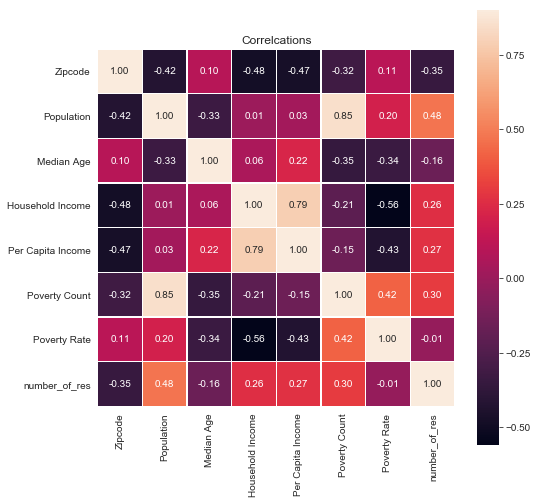

In [15]:
plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=0.9, square=True, linewidths=.3, annot=True, fmt=".2f")
plt.title("Correlcations")

2 根据变量之间的相关性热力图，可以看出Population和number of rest相关性较大

# Q1:Is there a relationship between avg household income and number of rest in a given zip code?

Household Income和number_of_res有较强的正相关性

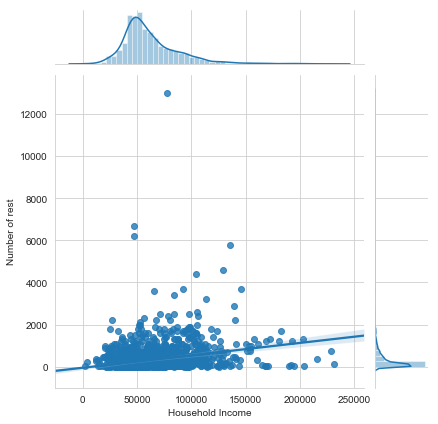

In [16]:
sns.jointplot('Household Income', "number_of_res", data=census_data, kind="reg")
plt.xlabel("Household Income")
plt.ylabel("Number of rest")
plt.show()

# Q2:Is there a relationship between household median age and number of restaurants that deliver?

Median Age和number_of_res相关性较低，几乎无影响

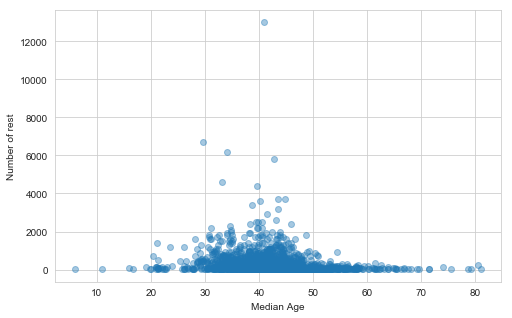

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(census_data["Median Age"], census_data['number_of_res'], alpha="0.4")
plt.xlabel("Median Age")
plt.ylabel("Number of rest")
plt.show()

3 此外，还发现Population以及Poverty Count都和number_of_res呈现一定正相关性

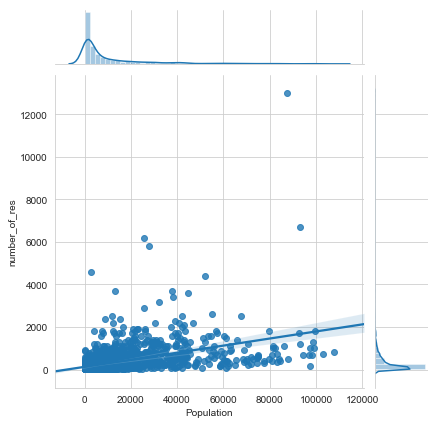

In [18]:
sns.jointplot('Population', "number_of_res", data=census_data, kind="reg")
plt.show()

# Poverty Count

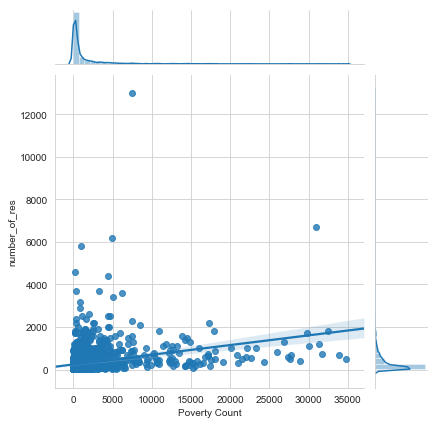

In [19]:
sns.jointplot('Poverty Count', "number_of_res", data=census_data, kind="reg")
plt.show()